In [55]:
import nrrd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from octvision3d.utils import get_filenames
from tqdm import tqdm

In [ ]:
### Used to plot the number of pixel labels per category in 3DSlicer .seg.nrrd files

In [56]:
path = "/home/mstudxk5/Desktop/check_for_blank_pixels"

In [65]:
filenames = get_filenames(path, "seg.nrrd")

label_counts = None
for i, f in tqdm(enumerate(filenames), total=len(filenames)):
    bitmap, header = nrrd.read(f)

    
    segment_names = {k.split("_")[0]: v for k, v in header.items() if k.endswith("Name")}
    sorted_name_map = natural_sort(segment_names.items())
    _, sorted_names = list(zip(*sorted_name_map))


    if i == 0:
        label_counts = np.sum(bitmap, axis=tuple(range(1, bitmap.ndim)))
    else:
        label_counts += np.sum(bitmap, axis=tuple(range(1, bitmap.ndim)))

df = pd.DataFrame(list(zip(sorted_names, label_counts)), columns=["Label", "Number of Pixels"])


100%|██████████| 70/70 [00:52<00:00,  1.33it/s]


In [66]:
print(label_counts.tolist())
print(df)

[0, 0, 0, 0, 0, 0, 9840637, 101893176, 344988591, 179740054, 2293101, 9057659, 37349038, 0, 0]
   Label  Number of Pixels
0    CNV                 0
1    DRU                 0
2     EX                 0
3    FLU                 0
4     GA                 0
5    HEM                 0
6    RPE           9840637
7    RET         101893176
8    CHO         344988591
9    VIT         179740054
10   HYA           2293101
11   SHS           9057659
12   ART          37349038
13   ERM                 0
14   SES                 0


<Axes: xlabel='Label', ylabel='Number of Pixels'>

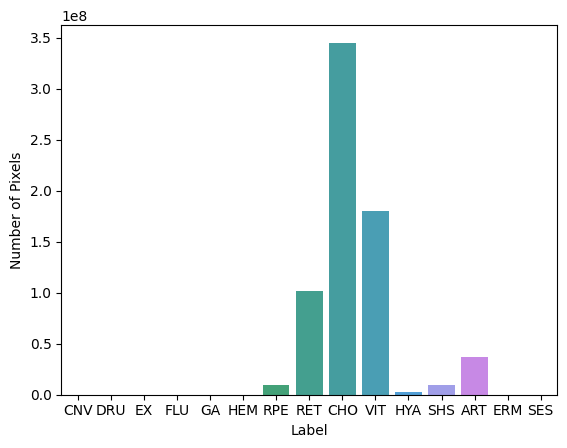

In [69]:
sns.barplot(data=df, x="Label", y="Number of Pixels", hue="Label")